# Basic text reading

In [ ]:
import nltk # Import NLTK
from nltk.corpus import reuters # Import the Reuters corpus (reuters is a news feed, more about business news)

In [ ]:
nltk.download('reuters')
reuters.fileids() # List file-ids in the corpus (basically all the documents present)

In [ ]:
reuters.categories() # List news categories in the corpus

In [ ]:
reuters.fileids(['wheat','rice']) # List file ids with either wheat or rice categories
# Some file ids may overlap as news covers multiple categories

In [ ]:
# Let us see how many chars, words and sentences are in each file
nltk.download('punkt')
for fileid in reuters.fileids(['wheat','rice']):
    num_chars = len(reuters.raw(fileid))
    num_words = len(reuters.words(fileid))
    num_sents = len(reuters.sents(fileid))
    num_vocab = len(set(w.lower() for w in reuters.words(fileid)))
    print(fileid, " : ",num_chars, num_words, num_sents, num_vocab)

In [ ]:
# Select one file for futher processing

fileid = 'test/15618'

reuters.raw(fileid) # See what is in the selected file

In [ ]:
reuters.words(fileid) # See individual words in the selected file

In [ ]:
# See sentences in the file. Notice the bracket within bracket for each sentence

reuters.sents(fileid) 

# Pre-processing: lower case, tokenization, removing stop words, finding words

In [ ]:
# See all the words in the file, lexicographically sorted

set(w.lower() for w in reuters.words(fileid))

In [ ]:
#Remove stop words
nltk.download('stopwords')
from nltk.corpus import stopwords # Import stop words
wordList = [w for w in reuters.words(fileid) if w.lower() not in stopwords.words('english')]
wordList

In [ ]:
#Tokenize

from nltk import word_tokenize # Tokenize the file, which is similar to getting words
tokens = word_tokenize(reuters.raw(fileid))
wordList = reuters.words(fileid)

tokens

In [ ]:
# Check out the difference between tokens and words. Tokenization is more intelligence segmentation

wordList[12:20]

In [ ]:
# Find position of a word

reuters.raw(fileid).find('MARKET')

# Synonyms, PoS Tagging, Parsing: Chunking, Chinking, Syntax Trees

In [ ]:
# Check out some synonyms
nltk.download('wordnet')
from nltk.corpus import wordnet as wn # See the list of synonyms
wn.synsets('trade')

In [ ]:
wn.synset('trade.v.02').lemma_names() # Read one particular synonym

In [ ]:
# Find text with similar context

text = nltk.Text(word.lower() for file_id in reuters.fileids(['wheat','rice']) for word in reuters.words(file_id))
text.similar('rice')

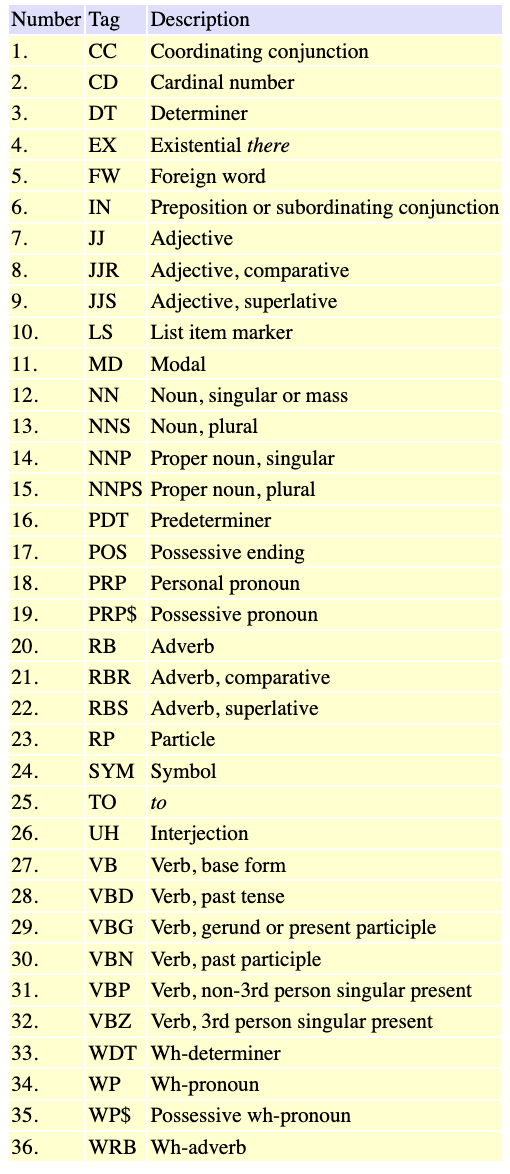

In [ ]:
# See PoS of tokens (for some corpora, POS are already tagged in this corpus)
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(tokens)

Recommended reading about regular expressions: 
1. [Regular Expression 1](https://youtu.be/WQlKPdKVXfw)
2. [Regular Expression 2](https://youtu.be/sHw5hLYFaIw)

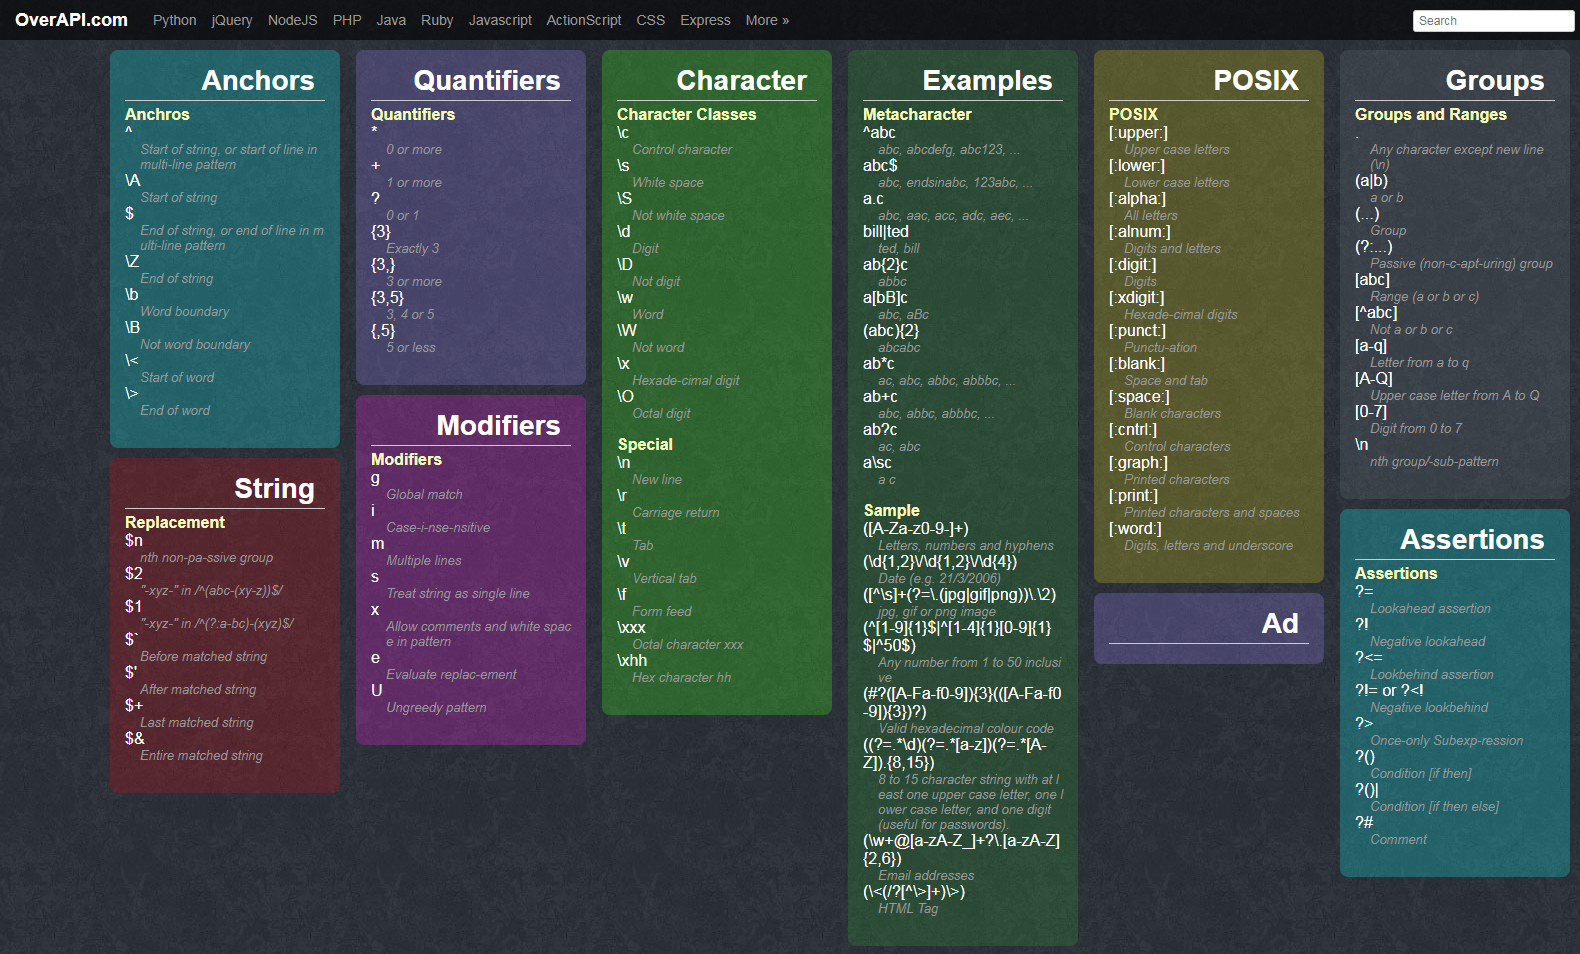

In [ ]:
# Parsing using regular expression with chunking (without chinking)

# We specify that noun phrase can have a determinant, adverb, gerund verb, or an adjective,
# but it must have a noun or a pronoun, e.g. "A fastly running beautiful deer..."
# The verb phrase should start with a verb, and then it can have anything.

pattern = """NP: {<DT>?<RB.?>?<VBG>?<JJ.?>*(<NN.?>|<PRP.?>)+}
             VP: {<VB.?>+<.*>*}
"""

mySentence = 'A fastly running beautiful deer skidded off the road'

myParser = nltk.RegexpParser(pattern)
myParsedSentence = myParser.parse(nltk.pos_tag(nltk.word_tokenize(mySentence)))
#myParsedSentence = myParser.parse(nltk.pos_tag(nltk.word_tokenize('The cat was going to eat bread but then he found a mouse')))
print(myParsedSentence)

In [ ]:
# Displaying a parse (syntax) tree. 
# Install Ghostscript: In Anacodna prompt, type 'conda install -c conda-forge ghostscript' 

# This cell will not work in Google Colab

# from IPython.display import display

# display(myParsedSentence)


myParsedSentence.draw() #it will normally open in a separate window

In [ ]:
# Let us try another sentence with chunking (without chinking)

mySentence = 'I left to do my homework'

myParser = nltk.RegexpParser(pattern)
myParsedSentence = myParser.parse(nltk.pos_tag(nltk.word_tokenize(mySentence)))
print(myParsedSentence)

In [ ]:
# This cell will not work in Google Colab. run in jupyterlab or jupyter notebook

myParsedSentence.draw()

In [ ]:
# Parsing using regular expression with chunking and chinking (exclusion rule)

# Redefine pattern with chinking, to exclude "to do something"
pattern = """NP: {<DT>?<RB.?>?<VBG>?<JJ.?>*(<NN.?>|<PRP.?>)+}
             VP: {<VB.?>+<.*>*}
                 }(<VBG>|(<TO><.*>*)){
"""

mySentence = 'I left to do my homework'

myParser = nltk.RegexpParser(pattern)
myParsedSentence = myParser.parse(nltk.pos_tag(nltk.word_tokenize(mySentence)))
print(myParsedSentence)

In [ ]:
# This cell will not work in Google Colab. run in jupyterlab or jupyter notebook


myParsedSentence.draw()

# Context free grammar (CFG)

In [ ]:
# Defining a grammar
from nltk import CFG

myGrammar = nltk.CFG.fromstring("""
    S -> NP VP
    VP -> VB NP
    VP -> VB
    VP -> VB PRP
    NP -> DET NN
    
    VB -> "chased"|"ate"
    DET -> "another"|"the"
    NN -> "cat"|"rat"|"snake"
    PRP -> "it"
""")


# Generating sentences from the defined grammar

from nltk.parse.generate import generate

for sent in generate(myGrammar):
    print(' '.join(sent))

# Frequency of words, bi-grams, tri-grams

A 2-gram (or bigram) is a two-word sequence of words, like “Full Stack”, or “excellent course”. And a 3-gram (or trigram) is a three-word sequence of words like “I love reading”, “about data science” or “Full Stack DS”.

In [ ]:
# Frequency Distribution of words

fdist = nltk.FreqDist(wordList)

fdist

In [ ]:
# Some n-gram examples in NLTK

from nltk.util import ngrams

bigrams = ngrams(tokens,2) # A bigram is specified by 2, trigram by 3, etc.
for b in bigrams:
    print(b)

In [ ]:
trigrams = ngrams(tokens,3) # A bigram is specified by 2, trigram by 3, etc.
for t in trigrams:
    print(t)

# Stemming, lemmatization

In [ ]:
# Comparing stemming and lemmatization
# Reading corpus and removing stop words
nltk.download('brown')
from nltk.corpus import brown
fileid = 'ck23'

from nltk.corpus import stopwords # Remove stop words
wordList = [w for w in brown.words(fileid) if w.lower() not in stopwords.words('english')]

import string # Remove punctuation
wordList = [w for w in wordList if w not in string.punctuation]

In [ ]:
# COMPARE TWO STEMMERS

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
porter = PorterStemmer()
lancaster = LancasterStemmer()

StemmersCompared = [word+' : '+porter.stem(word)+' : '+lancaster.stem(word) for word in wordList]
StemmersCompared

In [ ]:
# Lemmatization compared to Stemming

from nltk.stem import WordNetLemmatizer
wordNet = WordNetLemmatizer()

StemmersCompared = [word+' : '+porter.stem(word)+' : '+lancaster.stem(word)+' : '+wordNet.lemmatize(word) for word in wordList]
StemmersCompared